In [19]:
import pandas as pd

# Load all CSV files from the "data" folder
abbrev = pd.read_csv("data/basketball_abbrev.csv")
awards_coaches = pd.read_csv("data/basketball_awards_coaches.csv")
awards_players = pd.read_csv("data/basketball_awards_players.csv")
coaches = pd.read_csv("data/basketball_coaches.csv")
draft = pd.read_csv("data/basketball_draft.csv")
hof = pd.read_csv("data/basketball_hof.csv")
master = pd.read_csv("data/basketball_master.csv")
allstar = pd.read_csv("data/basketball_player_allstar.csv")
series_post = pd.read_csv("data/basketball_series_post.csv")
teams = pd.read_csv("data/basketball_teams.csv")

# Preview to confirm everything works
master.head()


,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
1,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
2,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,G,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
3,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,G,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B
4,abdulta01,Tariq,Tariq,NaN,Abdul-Wahad,NaN,Olivier Michael Saint-Jean,NaN,NaN,G-F,...,1974-11-03,Maisons Alfort,NaN,FRA,Lycee Aristide Briand,Evreux,NaN,FRA,0000-00-00,B


In [20]:
# 📦 Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 🔹 Load the data
draft = pd.read_csv("data/basketball_draft.csv")
master = pd.read_csv("data/basketball_master.csv")
allstar = pd.read_csv("data/basketball_player_allstar.csv")

# 🔹 Merge draft + player info
df = pd.merge(draft, master, left_on='playerID', right_on='bioID')

# 🔹 Label All-Star players
df['is_all_star'] = df['playerID'].isin(allstar['player_id']).astype(int)

# 🔹 Select and clean relevant features
df = df[['height', 'weight', 'draftRound', 'college', 'is_all_star']]
df = df.dropna()
df['draftRound'] = pd.to_numeric(df['draftRound'], errors='coerce')
df = df.dropna()

# 🔹 Encode the college column
le = LabelEncoder()
df['college'] = le.fit_transform(df['college'])

# 🔹 Define features and label
X = df.drop('is_all_star', axis=1)
y = df['is_all_star']

# 🔹 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 🔹 Train and evaluate model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:

# 🔹 Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7401574803149606
Confusion Matrix:
 [[533 105]
 [ 93  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       638
           1       0.23      0.25      0.24       124

    accuracy                           0.74       762
   macro avg       0.54      0.54      0.54       762
weighted avg       0.75      0.74      0.74       762



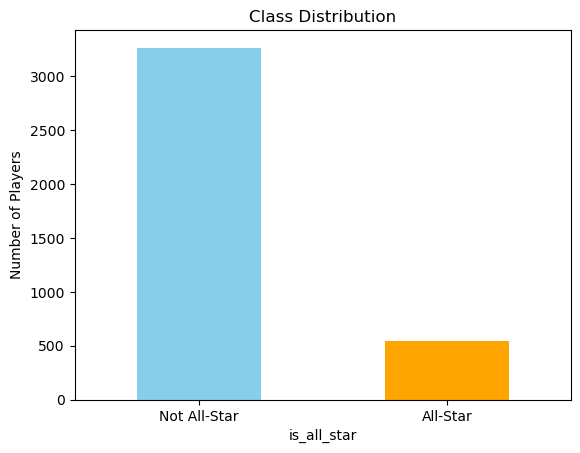

In [22]:
# 🔹 Class distribution visualization
df['is_all_star'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['Not All-Star', 'All-Star'], rotation=0)
plt.title('Class Distribution')
plt.ylabel('Number of Players')
plt.show()
